<a href="https://colab.research.google.com/github/jagdishdatascintist/jagdish_aiml/blob/main/Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
df = pd.read_csv('/content/drive/MyDrive/train (1).csv')
df1 = pd.read_csv('/content/drive/MyDrive/test.csv')
print(df.head())
print(df1.head())


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [245]:
print(df.info())
print()
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [246]:
print(df.describe())
print()
print(df1.describe())

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000

                 id
count   3263.000000
mean    5427.152927
std     3146.427221
min        0.000000
25%     2683.000000
50%     5500.000000
75%     8176.000000
max    10875.000000


In [247]:
print(df.shape)
print(df1.shape)

(7613, 5)
(3263, 4)


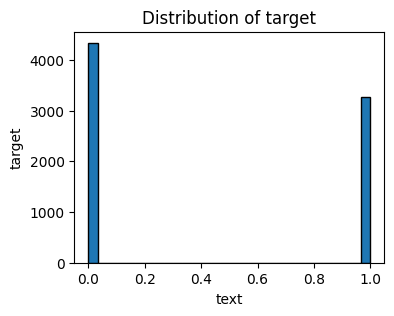

KeyboardInterrupt: 

In [274]:
plt.figure(figsize=(4,3))
plt.hist(df['target'], bins=30, edgecolor='black')
plt.xlabel('text')
plt.ylabel('target')
plt.title('Distribution of target')
plt.show()

# Example 2: Scatter plot of two numerical columns
plt.figure(figsize=(5,6))
plt.scatter(df['text'], df['target']) # Replace with your column names
plt.xlabel('text')
plt.ylabel('target')
plt.title('text vs. target')
plt.show()


# # Example 3: Boxplot of a numerical column grouped by a categorical column
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='OverallQual', y='SalePrice', data=df) #Replace with your column names
# plt.xlabel('Overall Quality')
# plt.ylabel('SalePrice')
# plt.title('SalePrice Distribution by Overall Quality')
# plt.show()

# # Example 4: Correlation Heatmap
# plt.figure(figsize=(12, 10))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()

In [248]:
print(df.isnull().sum())
print()
print(df1.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

id             0
keyword       26
location    1105
text           0
dtype: int64


In [249]:
df['text'].duplicated().sum()
df1.duplicated().sum()

0

In [250]:
df['text'] = df['text'].drop_duplicates()

In [251]:
df.shape
df1.shape

(3263, 4)

In [252]:
df=df.drop(columns=['id','keyword','location'])
df1=df1.drop(columns=['id','keyword','location'])

In [253]:
print(df.head())
print()
print(df1.head())

                                                text  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1

                                                text
0                 Just happened a terrible car crash
1  Heard about #earthquake is different cities, s...
2  there is a forest fire at spot pond, geese are...
3           Apocalypse lighting. #Spokane #wildfires
4      Typhoon Soudelor kills 28 in China and Taiwan


In [254]:
print(df.shape)
print(df1.shape)

(7613, 2)
(3263, 1)


In [255]:
print(df['text'][6])
print()
print(df1['text'][6])

#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas

They'd probably still show more life than Arsenal did yesterday, eh? EH?


In [256]:
import re
import nltk
nltk.download('punkt_tab')
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    cleaned_text = ' '.join(text)
    return cleaned_text
df['text'] = df['text'].apply(clean_text)
df1['text'] = df1['text'].apply(clean_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [257]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['text'] = df['text'].apply(remove_emoji)
df1['text'] = df1['text'].apply(remove_emoji)

In [258]:
df['text'].head()

,text
0,o u r d e e d s a r e t h e r e a s o ...
1,f o r e s t f i r e n e a r l a r o n ...
2,a l l r e s i d e n t s a s k e d t o ...
3,p e o p l e r e c e i v e w i l d f i r ...
4,j u s t g o t s e n t t h i s p h o t ...


In [259]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens
df['tokenized_text'] = df['text'].apply(tokenize_text)
df1['tokenized_text'] = df1['text'].apply(tokenize_text)

In [260]:
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens
df['tokenized_text'] = df['tokenized_text'].apply(remove_stopwords)
df1['tokenized_text'] = df1['tokenized_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [261]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
df['tokenized_text'] = df['tokenized_text'].apply(lemmatize_tokens)
df1['tokenized_text'] = df1['tokenized_text'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [262]:
print(df['text'].head())
print(df1['text'].head())

0    o u r   d e e d s   a r e   t h e   r e a s o ...
1    f o r e s t   f i r e   n e a r   l a   r o n ...
2    a l l   r e s i d e n t s   a s k e d   t o   ...
3      p e o p l e   r e c e i v e   w i l d f i r ...
4    j u s t   g o t   s e n t   t h i s   p h o t ...
Name: text, dtype: object
0    j u s t   h a p p e n e d   a   t e r r i b l ...
1    h e a r d   a b o u t   e a r t h q u a k e   ...
2    t h e r e   i s   a   f o r e s t   f i r e   ...
3    a p o c a l y p s e   l i g h t i n g   s p o ...
4    t y p h o o n   s o u d e l o r   k i l l s   ...
Name: text, dtype: object


In [263]:
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)
vectorizer = Word2Vec(sentences=df1['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

def get_doc_vector(tokens):
    vectors = [vectorizer.wv[token] for token in tokens if token in vectorizer.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vectorizer.vector_size)

df['sentence_vector'] = df['tokenized_text'].apply(get_doc_vector)
df1['sentence_vector'] = df1['tokenized_text'].apply(get_doc_vector)

X_train = np.vstack(df['sentence_vector'].values)
X_test = np.vstack(df1['sentence_vector'].values)

In [264]:
y_train = df['target']

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

model = RandomForestClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(confusion_matrix(y_train,y_pred))


y_pred_test = model.predict(X_test)
print(accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))



model1 = LogisticRegression(solver='saga',max_iter=1000)
model1.fit(X_train,y_train)

y_pred = model1.predict(X_train)
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

y_pred_test = model1.predict(X_test)
print(accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

# model2 = SVC(kernel='linear')
# model2.fit(X_train,y_train)

# y_pred = model2.predict(X_train)
# y_pred_test = model2.predict(X_test)
# print(accuracy_score(y_train,y_pred))
# print(accuracy_score(y_test,y_pred_test))
# print(classification_report(y_test,y_pred_test))
# print(confusion_matrix(y_test,y_pred_test))

# model3 = GaussianNB()
# model3.fit(X_train,y_train)

# y_pred = model3.predict(X_train)
# y_pred_test = model3.predict(X_test)
# print(accuracy_score(y_train,y_pred))
# print(accuracy_score(y_test,y_pred_test))
# print(classification_report(y_test,y_pred_test))
# print(confusion_matrix(y_test,y_pred_test))

0.8647051096808092
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4342
           1       0.90      0.77      0.83      3271

    accuracy                           0.86      7613
   macro avg       0.87      0.85      0.86      7613
weighted avg       0.87      0.86      0.86      7613

[[4060  282]
 [ 748 2523]]
0.7051792828685259
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.71      3263
   macro avg       0.50      0.35      0.41      3263
weighted avg       1.00      0.71      0.83      3263



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.5748062524628924
0.5748062524628924
              precision    recall  f1-score   support

           0       0.57      0.98      0.72      4342
           1       0.57      0.04      0.08      3271

    accuracy                           0.57      7613
   macro avg       0.57      0.51      0.40      7613
weighted avg       0.57      0.57      0.45      7613

0.9684339564817652
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.97      3263
   macro avg       0.50      0.48      0.49      3263
weighted avg       1.00      0.97      0.98      3263



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [265]:
X_train.shape

(7613, 100)

In [266]:
sample = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [267]:
y_test = sample['target']

In [268]:
y_test.shape

(3263,)